<i>STATISTICAL MODEL</i><br>
--
Coded by :
* Khevin Pandapotan (No GitHub)
* Hamora Hadi

In [2]:
import math
import os
import random
from pathlib import Path
from collections import defaultdict
from itertools import product
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from dmba import plotDecisionTree, textDecisionTree
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

In [3]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [4]:
loan200 = pd.read_csv('C:/Users/User/Desktop/Statistical_Model/loan200.csv')
loan200.head(10)

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81
5,paid off,1.89923,11.34
6,default,2.78485,16.00
7,paid off,13.85620,11.24
8,default,11.68480,27.78
9,default,9.43396,24.15


In [6]:
predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

In [9]:
newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
knn.predict(newloan)

array(['paid off'], dtype=object)

In [10]:
knn.predict_proba(newloan)

array([[0.45, 0.55]])

In [12]:
nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

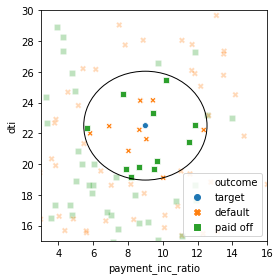

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', data=loan200, alpha=0.3, ax=ax)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', 
                data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]), 
                ax=ax, legend=False)
ellipse = Ellipse(xy=newloan.values[0], 
                  width=2 * maxDistance, height=2 * maxDistance,
                  edgecolor='black', fc='None', lw=1)
ax.add_patch(ellipse)
ax.set_xlim(3, 16)
ax.set_ylim(15, 30)

plt.tight_layout()
plt.show()

<b>Standardization</b>

In [23]:
loan_data = pd.read_csv('C:/Users/User/Desktop/Statistical_Model/loan_data.csv')
loan_data.head(10)

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
5,6,Charged Off,21000,36 months,105000,13.22,8.01977,32135,90.3,debt_consolidation,...,1,1,7,5.8,default,11,debt_consolidation,RENT,> 1 Year,0.40
6,7,Charged Off,6000,36 months,76000,2.40,3.13358,5963,29.7,major_purchase,...,1,1,7,5.6,default,2,major_purchase,RENT,> 1 Year,0.70
7,8,Charged Off,15000,36 months,60000,15.22,10.29280,5872,57.6,debt_consolidation,...,1,1,7,4.4,default,10,debt_consolidation,RENT,> 1 Year,0.50
8,9,Charged Off,5000,60 months,50004,13.97,2.96736,4345,59.5,other,...,0,1,14,3.4,default,3,other,RENT,> 1 Year,0.45
9,10,Charged Off,5000,36 months,100000,16.33,1.90524,74351,62.1,debt_consolidation,...,1,1,17,7.0,default,11,debt_consolidation,MORTGAGE,> 1 Year,0.50


In [24]:
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)

In [29]:
predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

In [30]:
newloan = loan_data.loc[0:0, predictors]

In [31]:
newloan

,payment_inc_ratio,dti,revol_bal,revol_util
0,2.3932,1.0,1687,9.4


In [32]:
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
nbrs = knn.kneighbors(newloan)

In [34]:
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
35536,1.47212,1.46,1686,10.0
33651,3.38178,6.37,1688,8.4
25863,2.36303,1.39,1691,3.5
42953,1.28160,7.14,1684,3.9
43599,4.12244,8.98,1684,7.2


In [35]:
newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
nbrs = knn.kneighbors(newloan_std)
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
2080,2.61091,1.03,1218,9.7
1438,2.34343,0.51,278,9.9
30215,2.71200,1.34,1075,8.5
28542,2.39760,0.74,2917,7.4
44737,2.34309,1.37,488,7.2


count    45342.000000
mean         0.501104
std          0.128734
min          0.000000
25%          0.400000
50%          0.500000
75%          0.600000
max          0.950000
Name: borrower_score, dtype: float64

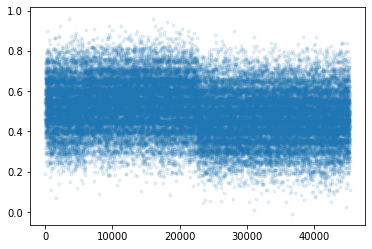

In [41]:
# Using KNN!
loan_data = pd.read_csv('C:/Users/User/Desktop/Statistical_Model/loan_data.csv')
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)

predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc', 
              'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
plt.scatter(range(len(X)), [bs + random.gauss(0, 0.015) for bs in knn.predict_proba(X)[:,0]], 
            alpha=0.1, marker='.')
knn.predict_proba(X)[:, 0]

loan_data['borrower_score'] = knn.predict_proba(X)[:, 0]
loan_data['borrower_score'].describe()

In [49]:
loan3000 = pd.read_csv('C:/Users/User/Desktop/Statistical_Model/loan3000.csv')
loan3000.head(10)

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320
5,35621,paid off,debt_consolidation,12.12,0.50,3.89391
6,9920,default,debt_consolidation,29.79,0.40,7.00390
7,42095,paid off,debt_consolidation,7.94,0.40,10.04070
8,25219,paid off,debt_consolidation,10.81,0.55,3.54972
9,26196,paid off,debt_consolidation,16.37,0.45,7.50984


In [50]:
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

In [51]:
loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
                                   min_impurity_decrease=0.003)

In [53]:
loan_tree.fit(X, y)
print(textDecisionTree(loan_tree))

node=0 test node: go to node 1 if 0 <= 0.5750000178813934 else to node 6
  node=1 test node: go to node 2 if 0 <= 0.32500000298023224 else to node 3
    node=2 leaf node: [[0.785, 0.215]]
    node=3 test node: go to node 4 if 1 <= 10.42264986038208 else to node 5
      node=4 leaf node: [[0.488, 0.512]]
      node=5 leaf node: [[0.613, 0.387]]
  node=6 test node: go to node 7 if 1 <= 9.19082498550415 else to node 10
    node=7 test node: go to node 8 if 0 <= 0.7249999940395355 else to node 9
      node=8 leaf node: [[0.247, 0.753]]
      node=9 leaf node: [[0.073, 0.927]]
    node=10 leaf node: [[0.457, 0.543]]


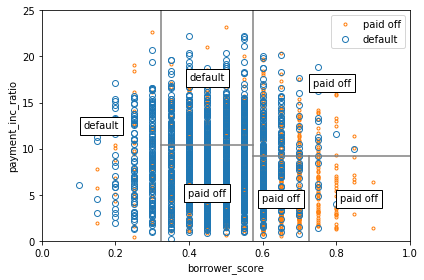

In [54]:
fig, ax = plt.subplots(figsize=(6, 4))

loan3000.loc[loan3000.outcome=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.', 
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
loan3000.loc[loan3000.outcome=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o', 
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

x0 = 0.575
x1a = 0.325; y1b = 9.191
y2a = 10.423; x2b = 0.725
ax.plot((x0, x0), (0, 25), color='grey')
ax.plot((x1a, x1a), (0, 25), color='grey')
ax.plot((x0, 1), (y1b, y1b), color='grey')
ax.plot((x1a, x0), (y2a, y2a), color='grey')
ax.plot((x2b, x2b), (0, y1b), color='grey')

labels = [('default', (x1a / 2, 25 / 2)),
          ('default', ((x0 + x1a) / 2, (25 + y2a) / 2)),
          ('paid off', ((x0 + x1a) / 2, y2a / 2)),
          ('paid off', ((1 + x0) / 2, (y1b + 25) / 2)),
          ('paid off', ((1 + x2b) / 2, (y1b + 0) / 2)),
          ('paid off', ((x0 + x2b) / 2, (y1b + 0) / 2)),
         ]
for label, (x, y) in labels:
    ax.text(x, y, label, bbox={'facecolor':'white'},
            verticalalignment='center', horizontalalignment='center')

plt.tight_layout()
plt.show()

In [55]:
def entropyFunction(x):
    if x == 0: return 0
    return -x * math.log(x, 2) - (1 - x) * math.log(1 - x, 2)

In [56]:
def giniFunction(x):
    return x * (1 - x)

In [58]:
x = np.linspace(0, 0.5, 50)
impure = pd.DataFrame({
    'x': x,
    'Accuracy': 2 * x,
    'Gini': [giniFunction(xi) / giniFunction(.5) for xi in x],
    'Entropy': [entropyFunction(xi) for xi in x],
})

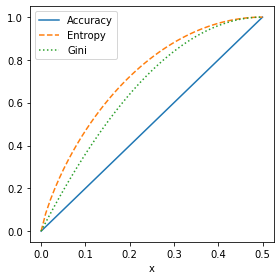

In [61]:
fig, ax = plt.subplots(figsize=(4, 4))

impure.plot(x='x', y='Accuracy', ax=ax, linestyle='solid')
impure.plot(x='x', y='Entropy', ax=ax, linestyle='--')
impure.plot(x='x', y='Gini', ax=ax, linestyle=':')

plt.tight_layout()
plt.show()

In [62]:
# Random Forest
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

rf = RandomForestClassifier(n_estimators=500, random_state=1, 
                            oob_score=True)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [63]:
rf.oob_decision_function_

array([[0.18131868, 0.81868132],
       [0.26704545, 0.73295455],
       [0.93333333, 0.06666667],
       ...,
       [1.        , 0.        ],
       [0.73157895, 0.26842105],
       [0.68085106, 0.31914894]])

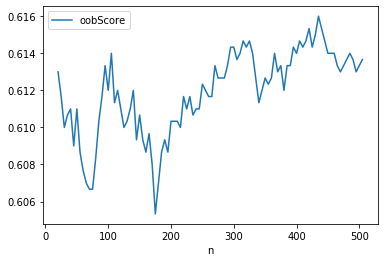

In [64]:
n_estimator = list(range(20, 510, 5))
oobScores = []
for n in n_estimator:
    rf = RandomForestClassifier(n_estimators=n, 
                                criterion='entropy', max_depth=5,
                                random_state=1, oob_score=True)
    rf.fit(X, y)
    oobScores.append(rf.oob_score_)

pd.DataFrame({
    'n': n_estimator, 
    'oobScore': oobScores
}).plot(x='n', y='oobScore')

In [66]:
predictions = X.copy()
predictions['prediction'] = rf.predict(X)
predictions.head(10)

,borrower_score,payment_inc_ratio,prediction
0,0.40,5.11135,default
1,0.40,5.43165,default
2,0.70,9.23003,paid off
3,0.40,2.33482,paid off
4,0.45,12.10320,default
5,0.50,3.89391,paid off
6,0.40,7.00390,default
7,0.40,10.04070,default
8,0.55,3.54972,paid off
9,0.45,7.50984,default


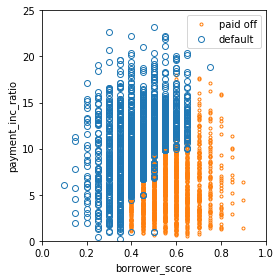

In [68]:
fig, ax = plt.subplots(figsize=(4, 4))
predictions.loc[predictions.prediction=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.',
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
predictions.loc[predictions.prediction=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o',
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

plt.tight_layout()
plt.show()

In [69]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 
              'payment_inc_ratio', 'revol_bal', 'revol_util', 
              'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 
              'open_acc', 'grade', 'emp_length', 'purpose_', 
              'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

In [71]:
X = pd.get_dummies(loan_data[predictors], drop_first=True)
y = loan_data[outcome]

In [72]:
rf_all = RandomForestClassifier(n_estimators=500, random_state=1)
rf_all.fit(X, y)

rf_all_entropy = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')

In [73]:
rf_all_entropy.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [74]:
rf = RandomForestClassifier(n_estimators=500)
scores = defaultdict(list)

In [75]:
for _ in range(3):
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                                                          test_size=0.3)
    rf.fit(train_X, train_y)
    acc = metrics.accuracy_score(valid_y, rf.predict(valid_X))
    for column in X.columns:
        X_t = valid_X.copy()
        X_t[column] = np.random.permutation(X_t[column].values)
        shuff_acc = metrics.accuracy_score(valid_y, rf.predict(X_t))
        scores[column].append((acc-shuff_acc)/acc)

In [76]:
print('Features sorted by their score:')
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

Features sorted by their score:
[(0.0727, 'borrower_score'), (0.0378, 'grade'), (0.027, 'term_60 months'), (0.012, 'annual_inc'), (0.0061, 'payment_inc_ratio'), (0.0051, 'dti'), (0.0027, 'purpose_small_business'), (0.0024, 'emp_length'), (0.0021, 'revol_util'), (0.0018, 'purpose__small_business'), (0.0017, 'open_acc'), (0.001, 'revol_bal'), (0.001, 'purpose_credit_card'), (0.001, 'purpose__other'), (0.001, 'home__RENT'), (0.0008, 'purpose_other'), (0.0008, 'purpose_major_purchase'), (0.0007, 'delinq_2yrs_zero'), (0.0005, 'purpose__home_improvement'), (0.0003, 'purpose__major_purchase'), (0.0003, 'emp_len__ > 1 Year'), (0.0002, 'purpose_wedding'), (0.0002, 'purpose_moving'), (0.0001, 'purpose_vacation'), (0.0001, 'pub_rec_zero'), (0.0, 'purpose_debt_consolidation'), (-0.0001, 'purpose__debt_consolidation'), (-0.0002, 'purpose_house'), (-0.0002, 'home__OWN'), (-0.0003, 'purpose_medical'), (-0.0003, 'purpose_home_improvement'), (-0.0003, 'purpose__medical'), (-0.0019, 'loan_amnt')]


In [77]:
importances = rf_all.feature_importances_

In [79]:
df = pd.DataFrame({
    'feature': X.columns, 
    'Accuracy decrease': [np.mean(scores[column]) for column in 
                         X.columns],
    'Gini decrease': rf_all.feature_importances_, 
    'Entropy decrease': rf_all_entropy.feature_importances_,
})
df = df.sort_values('Accuracy decrease')

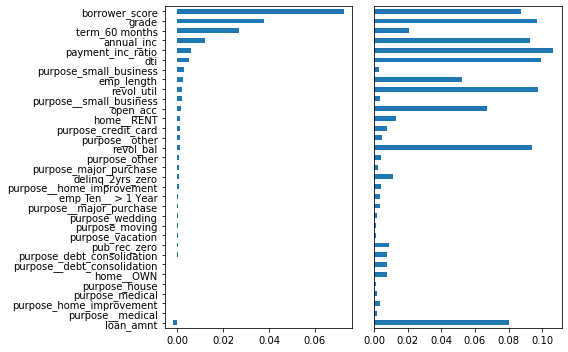

In [80]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
ax = df.plot(kind='barh', x='feature', y='Accuracy decrease', 
             legend=False, ax=axes[0])
ax.set_ylabel('')

ax = df.plot(kind='barh', x='feature', y='Gini decrease', 
             legend=False, ax=axes[1])
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [82]:
# XGBoosting
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

In [83]:
X = loan3000[predictors]
y = loan3000[outcome]

In [84]:
xgb = XGBClassifier(objective='binary:logistic', subsample=.63)

In [86]:
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.63,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
xgb_df = X.copy()
xgb_df['prediction'] = xgb.predict(X)
xgb_df['prob_default'] = xgb.predict_proba(X)[:, 0]

In [88]:
xgb_df.head(10)

,borrower_score,payment_inc_ratio,prediction,prob_default
0,0.40,5.11135,paid off,0.171144
1,0.40,5.43165,default,0.739844
2,0.70,9.23003,default,0.679195
3,0.40,2.33482,paid off,0.321995
4,0.45,12.10320,default,0.859796
5,0.50,3.89391,paid off,0.205094
6,0.40,7.00390,default,0.771959
7,0.40,10.04070,paid off,0.363510
8,0.55,3.54972,paid off,0.134250
9,0.45,7.50984,paid off,0.285996


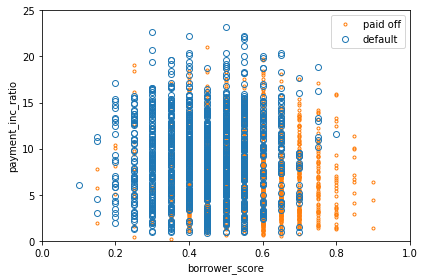

In [89]:
fig, ax = plt.subplots(figsize=(6, 4))

xgb_df.loc[xgb_df.prediction=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.', 
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
xgb_df.loc[xgb_df.prediction=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o', 
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

plt.tight_layout()
plt.show()

<i>Avoid the Overfitting?</i>

In [91]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 
              'payment_inc_ratio', 'revol_bal', 'revol_util', 
              'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 
              'open_acc', 'grade', 'emp_length', 'purpose_', 
              'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

In [92]:
X = pd.get_dummies(loan_data[predictors], drop_first=True)
y = pd.Series([1 if o == 'default' else 0 for o in loan_data[outcome]])

In [93]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=10000)

In [94]:
xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=0, learning_rate=0.3, subsample=1)
xgb_default.fit(train_X, train_y)
xgb_penalty = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=1000, learning_rate=0.1, subsample=0.63)

In [95]:
xgb_penalty.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1000, scale_pos_weight=1, subsample=0.63,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
pred_default = xgb_default.predict_proba(train_X)[:, 1]
error_default = abs(train_y - pred_default) > 0.5
np.mean(error_default)

0.12263029822873635

In [97]:
pred_default = xgb_default.predict_proba(valid_X)[:, 1]
error_default = abs(valid_y - pred_default) > 0.5
np.mean(error_default)

0.3538

In [98]:
pred_penalty = xgb_penalty.predict_proba(valid_X)[:, 1]
error_penalty = abs(valid_y - pred_penalty) > 0.5
np.mean(error_penalty)

0.3281

In [99]:
results = []
for ntree_limit in range(1, 250):
    train_default = xgb_default.predict_proba(train_X, ntree_limit=ntree_limit)[:, 1]
    train_penalty = xgb_penalty.predict_proba(train_X, ntree_limit=ntree_limit)[:, 1]
    pred_default = xgb_default.predict_proba(valid_X, ntree_limit=ntree_limit)[:, 1]
    pred_penalty = xgb_penalty.predict_proba(valid_X, ntree_limit=ntree_limit)[:, 1]
    results.append({
        'iterations': ntree_limit,
        'default train': np.mean(abs(train_y - train_default) > 0.5),
        'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
        'default test': np.mean(abs(valid_y - pred_default) > 0.5),
        'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
    })

In [100]:
results = pd.DataFrame(results)
results.head(10)

,iterations,default train,penalty train,default test,penalty test
0,1,0.337247,0.334050,0.3499,0.3467
1,2,0.328136,0.339058,0.3443,0.3474
2,3,0.324034,0.336144,0.3397,0.3466
3,4,0.322025,0.336568,0.3373,0.3468
4,5,0.319195,0.338181,0.3381,0.3481
5,6,0.317667,0.336172,0.3372,0.3409
6,7,0.315460,0.337247,0.3370,0.3436
7,8,0.312405,0.337361,0.3353,0.3445
8,9,0.310254,0.335861,0.3359,0.3445
9,10,0.309405,0.334701,0.3359,0.3436


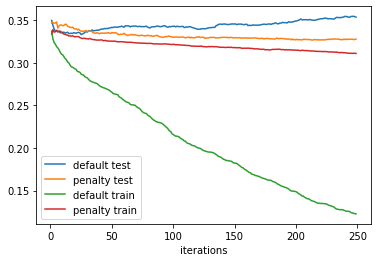

In [101]:
ax = results.plot(x='iterations', y='default test')
results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
results.plot(x='iterations', y='penalty train', ax=ax)
plt.show()

In [102]:
# HyperParameter and Cross-Validation
idx = np.random.choice(range(5), size=len(X), replace=True)
error = []
for eta, max_depth in product([0.1, 0.5, 0.9], [3, 6, 9]):
    xgb = XGBClassifier(objective='binary:logistic', n_estimators=250, 
                        max_depth=max_depth, learning_rate=eta)
    cv_error = []
    for k in range(5):
        fold_idx = idx == k
        train_X = X.loc[~fold_idx]; train_y = y[~fold_idx]
        valid_X = X.loc[fold_idx]; valid_y = y[fold_idx]

        xgb.fit(train_X, train_y)
        pred = xgb.predict_proba(valid_X)[:, 1]
        cv_error.append(np.mean(abs(valid_y - pred) > 0.5))
    error.append({
        'eta': eta,
        'max_depth': max_depth,
        'avg_error': np.mean(cv_error)
    })
    print(error[-1])
errors = pd.DataFrame(error)

{'eta': 0.1, 'max_depth': 3, 'avg_error': 0.3285833584034966}
{'eta': 0.1, 'max_depth': 6, 'avg_error': 0.3360123260492047}
{'eta': 0.1, 'max_depth': 9, 'avg_error': 0.3446987903844622}
{'eta': 0.5, 'max_depth': 3, 'avg_error': 0.34080422900806306}
{'eta': 0.5, 'max_depth': 6, 'avg_error': 0.3668527590066877}
{'eta': 0.5, 'max_depth': 9, 'avg_error': 0.37531646178877087}
{'eta': 0.9, 'max_depth': 3, 'avg_error': 0.3534065545683201}
{'eta': 0.9, 'max_depth': 6, 'avg_error': 0.38708707553791905}
{'eta': 0.9, 'max_depth': 9, 'avg_error': 0.38392829846136456}


In [104]:
errors.head(10)

,eta,max_depth,avg_error
0,0.1,3,0.328583
1,0.1,6,0.336012
2,0.1,9,0.344699
3,0.5,3,0.340804
4,0.5,6,0.366853
5,0.5,9,0.375316
6,0.9,3,0.353407
7,0.9,6,0.387087
8,0.9,9,0.383928


In [105]:
errors.pivot_table(index='eta', columns='max_depth', values='avg_error') * 100

max_depth,3,6,9
eta,,,
0.1,32.858336,33.601233,34.469879
0.5,34.080423,36.685276,37.531646
0.9,35.340655,38.708708,38.392830
